In [2]:
import json
import re
import sys
from konlpy.tag import Twitter
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc
import pytagcloud
import pandas as pd
from pandas import Series, DataFrame    

In [3]:
def showGraph(dust):
    font_location="C:\Windows\Fonts\HYKANB.ttf"
    font_name=font=font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font',family=font_name)
    plt.xlabel('주요단어')
    plt.ylabel('빈도수')
    plt.grid(True)

    Sorted_Dict_Values=sorted(dust.values(),reverse=True)
    Sorted_Dict_Keys=sorted(dust, key=dust.get, reverse=True)
    plt.bar(range(len(dust)),Sorted_Dict_Values,align='center')
    plt.xticks(range(len(dust)),list(Sorted_Dict_Keys),rotation='70') 
    plt.show()

In [4]:
def saveWorldCloud(wordInfo, filename): 
    taglist=pytagcloud.make_tags(dict(wordInfo).items(),maxsize=60)
    pytagcloud.create_tag_image(taglist,filename,size=(1000,500),fontname='kor',rectangular=False)

In [5]:
def get_tags(text, ntags=50):
    spliter = Twitter()
    # konlpy의 Twitter객체
    nouns = spliter.nouns(text)
    # nouns 함수를 통해서 text에서 명사만 분리/추출
    count = Counter(nouns)
    # Counter객체를 생성하고 참조변수 nouns할당
    return_list = []  # 명사 빈도수 저장할 변수
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수
    # 큰 명사부터 순서대로 입력받은 정수 갯수만큼 저장되어있는 객체 반환
    # 명사와 사용된 갯수를 return_list에 저장합니다.
    return return_list 

In [9]:
 def main():
    openFileName='남북정상회담 후_naver.json'
    output_file_Name = '남북정상회담 후(word파일).json'
    cloudImageFile='wordcloudAfter.jpg'
    rfile=open(openFileName, 'r', encoding='utf-8').read()
    open_output_file= open(output_file_Name, 'w', encoding='utf-8')
    jsonData=json.loads(rfile)
    message=""
    for item in jsonData:
        if 'description' in item.keys():
            message=message+re.sub(r'[^\w]', '', item['description'])+'' 
            
    nlp=Twitter()
    nouns=nlp.nouns(message)
    count=Counter(nouns)
    
    wordInfo=dict()
    for tags, counts in count.most_common(50):
        if (len(str(tags))>1):
            wordInfo[tags]=counts
            print("%s : %d" % (tags, counts))

    open_output_file.write('{} {}\n'.format(nouns, count)) 
    saveWorldCloud(wordInfo,cloudImageFile)


In [10]:
if __name__=="__main__":
    main()

남북정상회담 : 958
북한 : 304
정상회담 : 259
대통령 : 251
남북 : 236
이후 : 222
북미 : 214
평화 : 199
판문점 : 167
한반도 : 147
그림 : 144
기자 : 140
펀딩 : 138
한효주 : 138
인스타그램 : 138
문재인 : 127
회담 : 123
김정은 : 122
지난 : 108
한국 : 107
지난달 : 106
개최 : 106
선언 : 97
에서 : 90
비핵화 : 87
청와대 : 73
트럼프 : 72
미국 : 68
장관 : 67
정부 : 66
대한 : 65
대표 : 63
경제 : 63
길목 : 62
핵실험 : 62
정상 : 61
협력 : 60
이번 : 58
민주당 : 57
회의 : 52
관계 : 52


In [11]:
B_Korea = pd.DataFrame([{'주요단어' : '남북정상회담 후', '빈도수' : '977'},
                         {'주요단어' : '대통령', '빈도수' : '505'},
                         {'주요단어' : '정상회담', '빈도수' : '296'},
                         {'주요단어' : '평화', '빈도수' : '273'},
                         {'주요단어' : '정상', '빈도수' : '250'},
                         {'주요단어' : '판문점', '빈도수' : '237'},
                         {'주요단어' : '북미', '빈도수' : '221'},
                         {'주요단어' : '이후', '빈도수' : '197'},
                         {'주요단어' : '한반도', '빈도수' : '184'},
                         {'주요단어' : '남북', '빈도수' : '176'},
                         {'주요단어' : '북한', '빈도수' : '174'},
                         {'주요단어' : '문재인', '빈도수' : '169'},
                         {'주요단어' : '회의', '빈도수' : '160'},
                         {'주요단어' : '취임', '빈도수' : '157'},
                         {'주요단어' : '개최', '빈도수' : '146'},
                         {'주요단어' : '일본', '빈도수' : '145'},
                         {'주요단어' : '회담', '빈도수' : '136'},
                         {'주요단어' : '선언', '빈도수' : '130'},
                         {'주요단어' : '비핵화', '빈도수' : '126'},
                         {'주요단어' : '기자', '빈도수' : '114'},
                         {'주요단어' : '한국', '빈도수' : '113'},
                         {'주요단어' : '지난', '빈도수' : '102'},
                         {'주요단어' : '공동', '빈도수' : '101'},
                         {'주요단어' : '펀딩', '빈도수' : '97'},
                         {'주요단어' : '그림', '빈도수' : '97'},
                         {'주요단어' : '한효주', '빈도수' : '93'},
                         {'주요단어' : '인스타그램', '빈도수' : '93'},
                         {'주요단어' : '김정은', '빈도수' : '90'},
                         {'주요단어' : '지난달', '빈도수' : '90'},
                         {'주요단어' : '성공', '빈도수' : '87'},
                         {'주요단어' : '중국', '빈도수' : '87'},
                         {'주요단어' : '트럼프', '빈도수' : '83'},
                         {'주요단어' : '협력', '빈도수' : '75'},
                         {'주요단어' : '총리', '빈도수' : '74'},
                         {'주요단어' : '처음', '빈도수' : '73'},
                         {'주요단어' : '한중일', '빈도수' : '73'},
                         {'주요단어' : '장관', '빈도수' : '68'},    
                         {'주요단어' : '청와대', '빈도수' : '68'},
                         {'주요단어' : '썰전', '빈도수' : '63'},
                         {'주요단어' : '통화', '빈도수' : '62'},
                         {'주요단어' : '최근', '빈도수' : '59'},
                         {'주요단어' : '미국', '빈도수' : '56'},
                         {'주요단어' : '경제', '빈도수' : '53'},
                         {'주요단어' : '평양', '빈도수' : '52'},
                         {'주요단어' : '정부', '빈도수' : '52'},
                         {'주요단어' : '국민', '빈도수' : '43'},
                         {'주요단어' : '정착', '빈도수' : '43'},
                         {'주요단어' : '관계', '빈도수' : '42'},
                         {'주요단어' : '발표', '빈도수' : '42'},
                         {'주요단어' : '대표', '빈도수' : '39'}])

In [21]:
B_Korea.to_csv("남북정상회담 후.csv",encoding="cp949",mode="w",index=True)

In [12]:
B_Korea

빈도수      주요단어
0   977  남북정상회담 후
1   505       대통령
2   296      정상회담
3   273        평화
4   250        정상
5   237       판문점
6   221        북미
7   197        이후
8   184       한반도
9   176        남북
10  174        북한
11  169       문재인
12  160        회의
13  157        취임
14  146        개최
15  145        일본
16  136        회담
17  130        선언
18  126       비핵화
19  114        기자
20  113        한국
21  102        지난
22  101        공동
23   97        펀딩
24   97        그림
25   93       한효주
26   93     인스타그램
27   90       김정은
28   90       지난달
29   87        성공
30   87        중국
31   83       트럼프
32   75        협력
33   74        총리
34   73        처음
35   73       한중일
36   68        장관
37   68       청와대
38   63        썰전
39   62        통화
40   59        최근
41   56        미국
42   53        경제
43   52        평양
44   52        정부
45   43        국민
46   43        정착
47   42        관계
48   42        발표
49   39        대표

In [13]:
font_location="C:\Windows\Fonts\H2SA1M.ttf"
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10) 

In [14]:
x=B_Korea['주요단어']

In [15]:
y=B_Korea['빈도수']

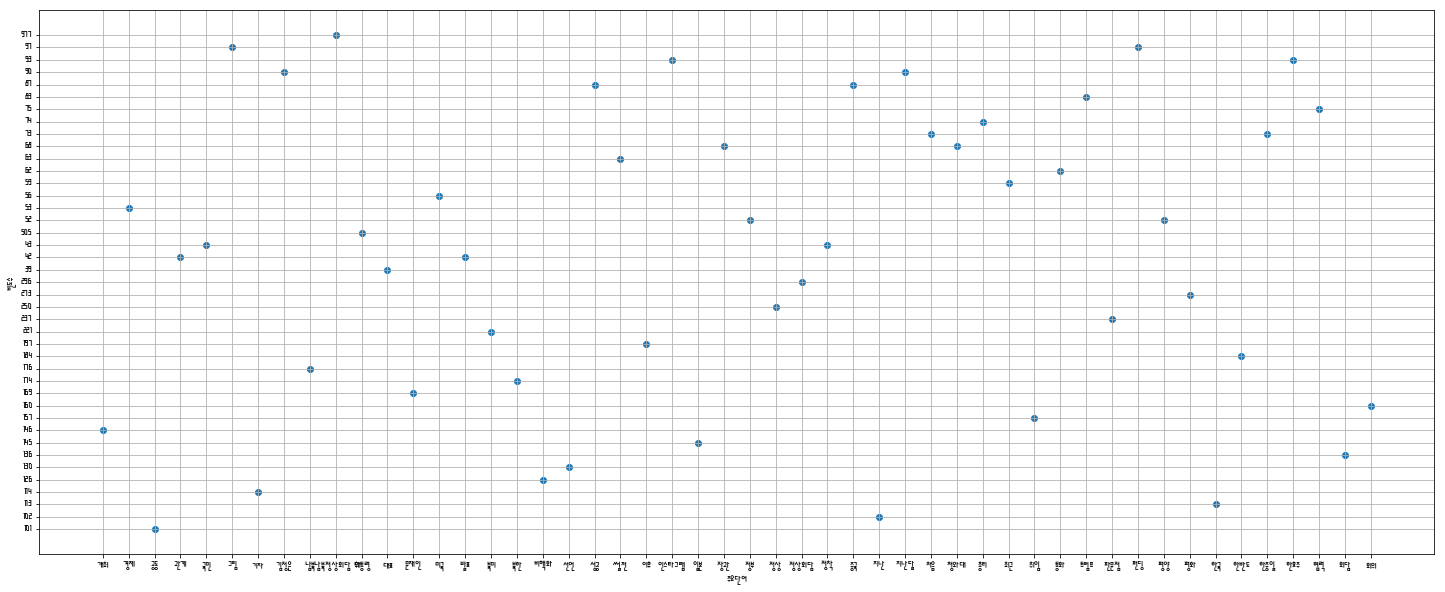

In [16]:
plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)

plt.scatter(x,y)

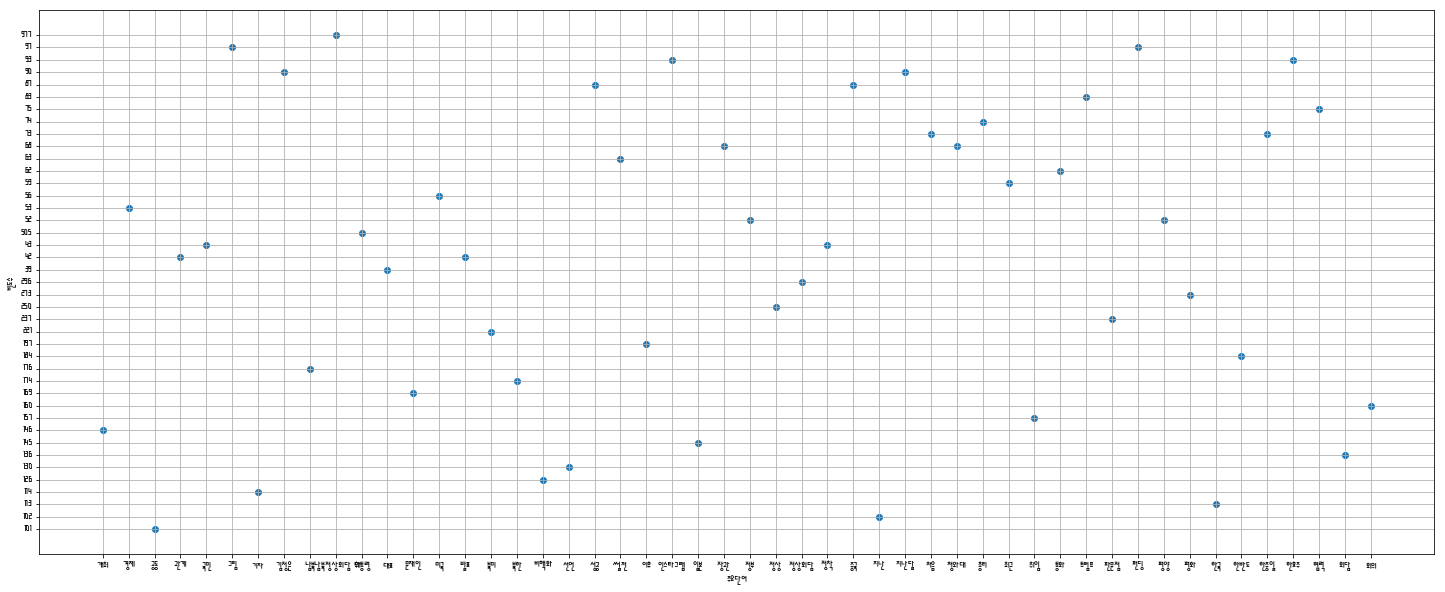

In [17]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10) 

x=B_Korea['주요단어']
y=B_Korea['빈도수']

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
plt.scatter(x,y)

In [18]:
Korea_D = pd.Series(B_Korea.빈도수, dtype ='i')
Korea_N = pd.Series(B_Korea.주요단어)

In [19]:
font_location="C:\Windows\Fonts\H2SA1M.ttf"
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10)
plt.scatter(B_Korea.index, Korea_N) 
plt.ylabel('남북정상회담 후') 
matplotlib.pyplot.xticks(fontsize=16)
plt.show()

In [20]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
    
plt.rcParams["figure.figsize"] = (25,10)
plt.bar(B_Korea.index, Korea_D)
plt.xticks(B_Korea.index, Korea_N, rotation='75')
plt.ylabel('남북정상회담 후') 
matplotlib.pyplot.xticks(fontsize=16)
plt.show()